In [1]:
import warnings
import os
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import pandas as pd
import os

# os.environ["OMP_NUM_THREADS"] = "1"

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Preprocessing
## Standard Scaling 📊
Standard Scaling, also known as Z-score normalization, is a technique used to scale numeric input features so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean value of each feature from the dataset and then dividing by the standard deviation.

### When to use Standard Scaling:

When your model assumes that the data is normally distributed, or when you want to make your features more comparable and avoid issues with models that are sensitive to the scale of the data, such as linear regression, logistic regression, support vector machines, neural networks, and k-nearest neighbors.
It's particularly useful when the features in your dataset have different units of measurement or when their ranges vary a lot.

## One-Hot Encoding ♨️
One-Hot Encoding is a method used to convert categorical data into a format that can be provided to ML algorithms to do a better job in prediction. For each unique category value in a feature, one-hot encoding creates a new binary column (1s and 0s) indicating the presence or absence of the category.

### When to use One-Hot Encoding:

When dealing with categorical data, especially if the categories do not have an ordinal relationship. This ensures that the model does not attribute a natural order to categories where it doesn’t exist. For example, encoding the categories "dog", "cat", and "bird" in a pet feature since these categories cannot be meaningfully ordered.
It is widely used before feeding categorical data to many kinds of models, as most machine learning algorithms cannot work directly with categorical data.

# Key Differences:

> Application: Standard Scaling is applied to numeric data, while One-Hot Encoding is applied to categorical data.

> Purpose: Standard Scaling normalizes the scale of numeric features, while One-Hot Encoding converts categorical features into a format that can be provided to ML algorithms.

## ColumnTransformer 🏛️
The basic idea behind ColumnTransformer is that it allows you to specify which transformations to apply to which columns in your data. You can apply a specific transformation (or series of transformations) to a subset of columns and a different transformation to other columns. This is especially useful in a pipeline that automates the process of applying these transformations to new data, including the data used for training and the unseen data used for prediction.

### How It Works
- Initialization: When initializing a ColumnTransformer, you provide it with a list of tuples. Each tuple contains a name, a transformer, and a column or columns to which that transformer should be applied. The transformer can be any object that follows scikit-learn's fit/transform interface, such as preprocessing functions like StandardScaler for numerical data or OneHotEncoder for categorical data.

- Fitting: When you fit the ColumnTransformer to your data, it internally fits each transformer to the columns specified for it.

- Transforming: When transforming your data, the ColumnTransformer applies each transformer to its respective columns and then concatenates the results. This means you get a single transformed output that you can feed directly into your machine learning model.

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [5]:
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [6]:
df_scaled.to_csv("../dados/Mall_Customers_no_CustomerID_scaled.csv", index=False)

## Elbow Method
### Description:
The Elbow Method involves running the clustering algorithm multiple times with a different number of clusters each time. For each run, the within-cluster sum of squares (WCSS) is calculated, which measures the variance within each cluster. As the number of clusters increases, the WCSS will naturally decrease as the clusters become more specific. The "elbow" refers to the point in the plot of the number of clusters vs. WCSS where the decrease in WCSS starts to slow down, indicating that adding more clusters does not significantly improve the fit of the model.

### Usage:

It's particularly useful when you need a quick and intuitive way to estimate the number of clusters.
Best when the data shows a clear elbow.
- Limitations:

The elbow point might not be clear or well-defined in some datasets.
It primarily considers the compactness of clusters, not how well they are separated.

## Silhouette Method
### Description:
The Silhouette Method measures how similar an object is to its own cluster compared to other clusters. The silhouette score is a metric that calculates the average silhouette coefficient for all instances, where the silhouette coefficient contrasts the average distance to instances in the nearest cluster with the average intra-cluster distance. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- Usage:

Useful for assessing the separation distance between the resulting clusters.
Can help identify the optimal number of clusters based on how well each object lies within its cluster.
Advantages:

Provides more detail than the Elbow Method by evaluating how well each object has been classified.
The score is a more universal criterion that can give you a clearer indication of the cluster structure.
Comparison and Recommendations
Clarity of Decision: The Elbow Method is more intuitive but can sometimes be ambiguous if a clear elbow is not present. The Silhouette Method gives a more definitive score, making it easier to make a decision based on the data.

- Consideration of Cluster Separation: The Elbow Method focuses on the compactness of the clusters, not how distinct they are from each other, whereas the Silhouette Method considers both how compact the cluster is and how well-separated it is from other clusters.

- Computational Complexity: Calculating silhouette scores can be more computationally intensive than calculating WCSS for the Elbow Method, especially for large datasets.

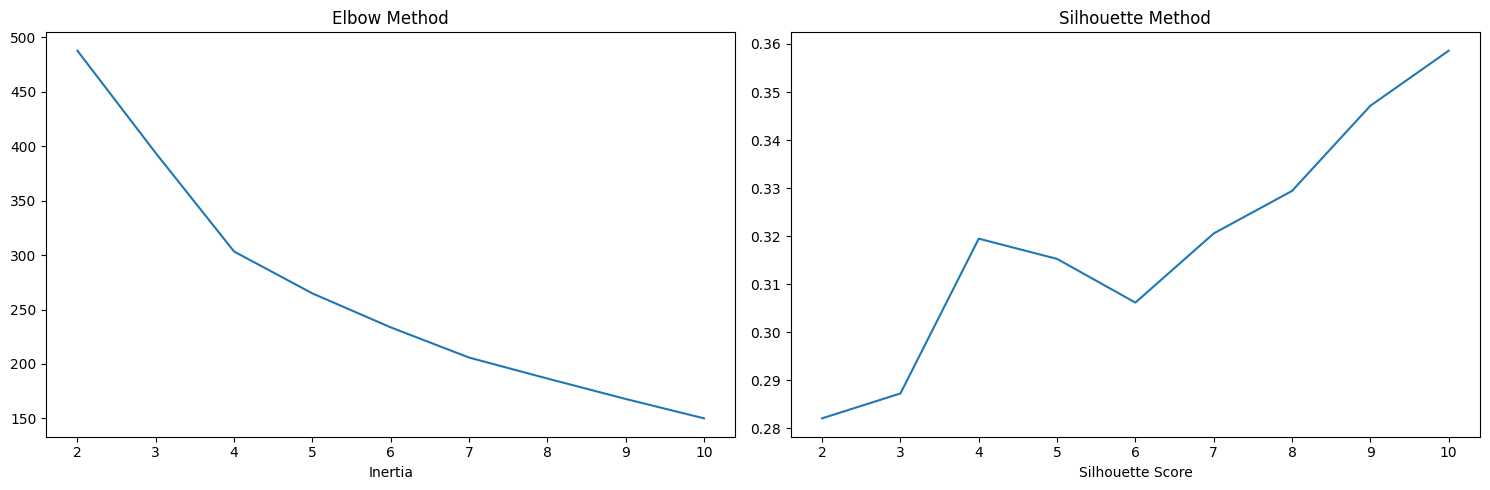

In [7]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters=5, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [9]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [10]:
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


## Pairplot Analysis
### When to Use Pairplot:
- `Exploratory Data Analysis (EDA):` When you're at the beginning stages of your data analysis or modeling process and want to understand the relationships between pairs of variables in your dataset.

- `Detecting Patterns:` To quickly spot patterns, trends, and correlations between the variables of a dataset. This can be helpful in identifying potential features for machine learning models.

- `Outlier Detection:` It can help in spotting outliers or unusual data points that may affect your analysis or models.

### Why Use Pairplot:
- `Comprehensive Overview:` It provides a comprehensive overview of how each variable relates to others in your dataset through scatter plots for joint relationships and histograms or density plots for univariate distributions, all in a single visualization.

- `Correlation Identification:` Helps in identifying potential linear relationships or correlations between variables, which can be pivotal in feature selection and engineering for machine learning models.

- `Facilitates Hypothesis Generation:` By visually representing the data, pairplot can help in generating hypotheses about the data, guiding further analysis or prompting specific tests.

- `Customization and Flexibility:` Seaborn's pairplot allows for significant customization, enabling you to tailor the plots to better suit your analysis needs. You can color points by a categorical variable to see how classes are distributed across these dimensions, use different kinds of plots for the diagonal elements, and much more.

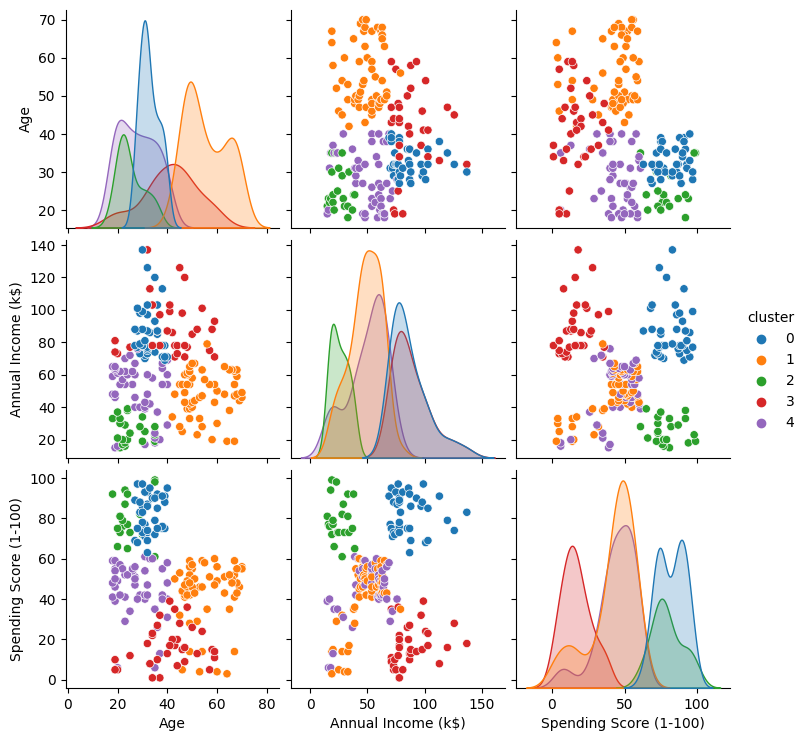

In [12]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

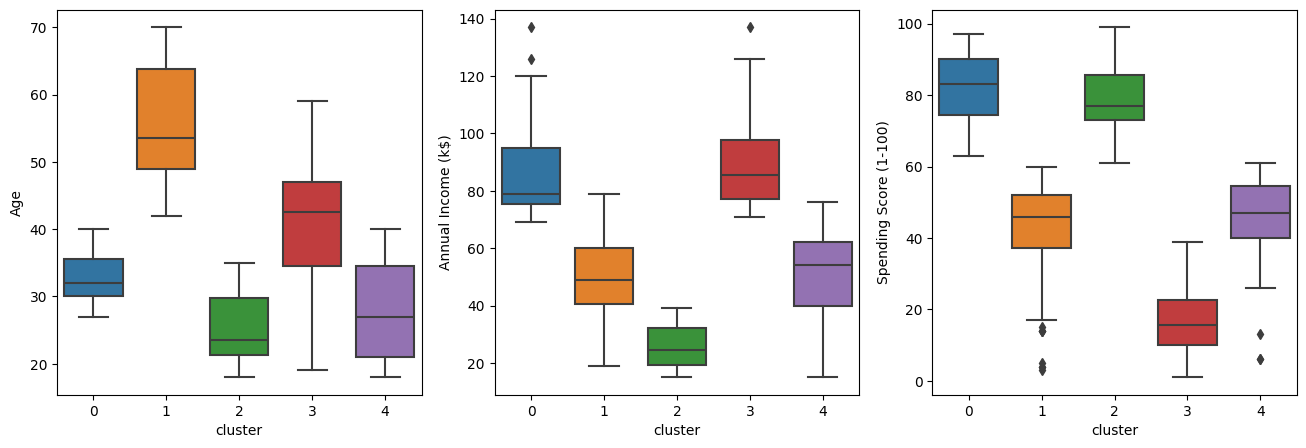

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax)
    
plt.show()

- Cluster 0 - high spending score, high income, young age
- Cluster 1 - moderate spending score, moderate income, high age
- Cluster 2 - high spending score, low income, young age
- Cluster 3 - low spending score, high income, moderate age
- Cluster 4 - moderate spending score, moderate income, young age

Converting the points above into a table:

| Spending Score | Income | Age   | Cluster |
|----------------|--------|-------|---------|
| High           | High   | Young | 0       |
| Moderate       | Moderate | High | 1       |
| High           | Low    | Young | 2       |
| Low            | High   | Moderate | 3    |
| Moderate       | Moderate | Young | 4       |

In [14]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [15]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

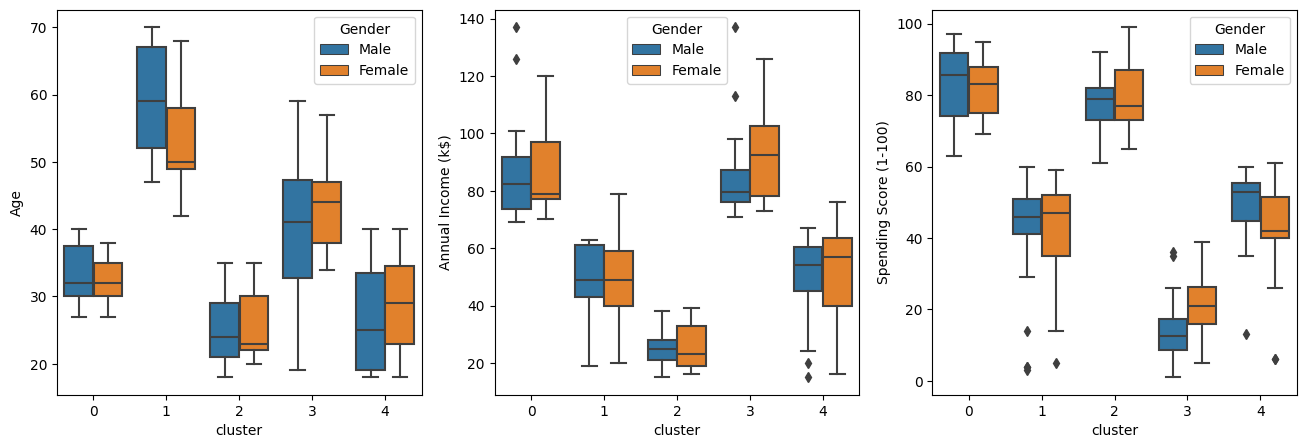

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, hue="Gender")
    
plt.show()

In [17]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [18]:
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [19]:
pipeline["clustering"].cluster_centers_[:, :-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [20]:
centroids=pipeline["clustering"].cluster_centers_[:, :-2]
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])